In [188]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression

# flights data
df=pd.read_csv('data/Train.csv')

df_1=df.copy()

In [189]:
df.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


# Data cleaning and feature engineering

In [190]:
df.shape

(107833, 10)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [192]:
#change data type for DATOP, STD and STA
df['DATOP'] =  pd.to_datetime(df['DATOP'], format='%Y-%m-%d')
df['STD'] =  pd.to_datetime(df['STD'], format='%Y-%m-%d %H:%M:%S')
df['STA'] =  pd.to_datetime(df['STA'], format='%Y-%m-%d %H.%M.%S')

In [193]:
df.head(2)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0


In [194]:
# displays sum of missing values per column
df.isnull().sum()

#no missing values

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [195]:
df["STATUS"].unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

In [196]:
# there is a space after the flight id
df['FLTID'] = df['FLTID'].astype(str).str[:-1]

In [197]:
#check if space is there
df['FLTID'][0]

#Looks good

'TU 0712'

In [198]:
df["DEPSTN"].unique()

array(['CMN', 'MXP', 'TUN', 'DJE', 'TLS', 'IST', 'ORY', 'MIR', 'BRU',
       'ABJ', 'VCE', 'AMS', 'FRA', 'BCN', 'JED', 'ALG', 'LIS', 'SXB',
       'LYS', 'OUA', 'LGW', 'BEY', 'NCE', 'OPO', 'MRS', 'DUS', 'SFA',
       'FCO', 'CDG', 'NKC', 'NTE', 'ZRH', 'GVA', 'OUD', 'MUC', 'SXF',
       'HAM', 'NDR', 'NBE', 'CAI', 'BEG', 'VIE', 'ORN', 'MAD', 'TOE',
       'BKO', 'DKR', 'KGL', 'BLQ', 'MLA', 'AHU', 'LHR', 'BOD', 'PRG',
       'LJU', 'SVO', 'MED', 'BUD', 'ARN', 'CPH', 'CRL', 'OST', 'TNG',
       'GAF', 'NAP', 'BRQ', 'OSR', 'YUL', 'NIM', 'TMR', 'JIB', 'CGN',
       'EBL', 'GAE', 'BJA', 'AYT', 'RAK', 'LFW', 'LIL', 'PMO', 'FBM',
       'TBJ', 'PSA', 'KRT', 'GNB', 'CZL', 'MVB', 'VNO', 'ESB', 'LBV',
       'CKY', 'LED', 'KSC', 'BTS', 'AMM', 'OTP', 'TRN', 'IEV', 'HBE',
       'CAG', 'KBP', 'ATH', 'SKG', 'ADB', 'DSS', 'DOH', 'COO', 'LUX',
       'FIH', 'BYJ', 'KEF', 'EBM', 'BDS', 'AAL', 'VKO', 'AAE', 'BRI',
       'VRN', 'SKX', 'HAJ', 'BLL', 'TLL', 'VOG', 'LAD', 'GHA', 'KTW',
       'SJJ', 'KRR',

In [199]:
df["DEPSTN"].value_counts()

DEPSTN
TUN    42522
DJE    10252
ORY     6755
MIR     5248
MRS     2845
       ...  
ADB        1
SKG        1
OTP        1
KBP        1
CTA        1
Name: count, Length: 132, dtype: int64

<Axes: xlabel='FLTID', ylabel='target'>

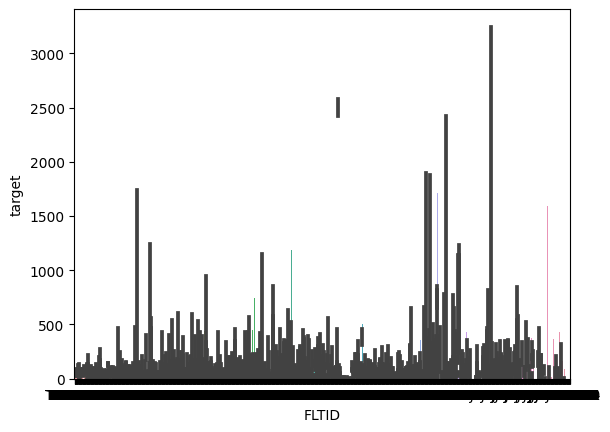

In [200]:
#bar plots FLTID
sns.barplot(x="FLTID", y="target", data=df)

<Axes: xlabel='DATOP', ylabel='target'>

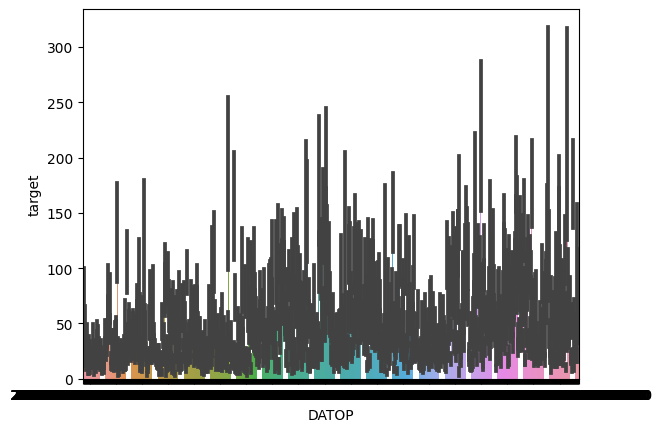

In [201]:
#bar plots DATOP
sns.barplot(x="DATOP", y="target", data=df)

## Assign numeric values to variables using One Hot Encoder & Pipeline Column Transformer

In [202]:
one_hot = pd.get_dummies(df['STATUS'])
df = df.drop('STATUS',axis = 1)
df = df.join(one_hot)

In [203]:
one_hot = pd.get_dummies(df['DEPSTN'],prefix='depart_')
df = df.drop('DEPSTN',axis = 1)
df = df.join(one_hot)

In [204]:
one_hot = pd.get_dummies(df['ARRSTN'], prefix='arrival_')
df = df.drop('ARRSTN',axis = 1)
df = df.join(one_hot)

In [205]:
one_hot = pd.get_dummies(df['AC'], prefix='ac_')
df = df.drop('AC',axis = 1)
df = df.join(one_hot)

In [206]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
enc = OneHotEncoder(sparse=False, drop='first')
df['DEPSTN'] = le.fit_transform(df_1[['DEPSTN']])
df['ARRSTN'] = le.fit_transform(df_1['ARRSTN'])
df['STATUS'] = le.fit_transform(df_1['STATUS'])
df['AC'] = le.fit_transform(df_1['AC'])

In [207]:
enc.fit_transform(df_1[['DEPSTN']])
enc.fit_transform(df_1[['ARRSTN']])
enc.fit_transform(df_1[['STATUS']])
enc.fit_transform(df_1[['AC']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [208]:
df_1.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


## Pipeline Columntransformer (from Joseph)

In [251]:
# Create the numerical pipe
numerical_pipe = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),  # impute missing values with a the mean of the column
    ("scale", MinMaxScaler()) # Scale the columns with a MinMaxScaler
    ])

In [252]:
# Create the categorical pipe
categorical_pipe = Pipeline(
    [
        ("impute", SimpleImputer(strategy="most_frequent")), # impute missing values in the categorical variables with the most frequent obs.
        ("ohe", OneHotEncoder(sparse_output=False, drop="first")) # Perform one hot encoding to the imputed columns. drop one redundant column
    ]
)

In [255]:
transformer = ColumnTransformer(
    [
        ("numerical_transform", numerical_pipe, ["DATOP", "STD", "STA"]), # Name of the process (can be anything), function to apply, which columns to apply to
        ("categorical_transform", categorical_pipe, ["FLTID", "DEPSTN", "ARRSTN", "STATUS", "AC"]),

    ],
    remainder="passthrough" # For the columns which we don't want to transform we pass through. the other option is to 'drop' them.
    )

In [256]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical_transform',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', MinMaxScaler())]),
                                 ['DATOP', 'STD', 'STA']),
                                ('categorical_transform',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['FLTID', 'DEPSTN', 'ARRSTN', 'STATUS',
                                  'AC'])])

In [257]:
# Let's now fit 
transformer.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical_transform',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', MinMaxScaler())]),
                                 ['DATOP', 'STD', 'STA']),
                                ('categorical_transform',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['FLTID', 'DEPSTN', 'ARRSTN', 'STATUS',
                                  'AC'])])

In [258]:
# Transform  now
df_new = transformer.transform(df)
df_new

array([[0.0018264840182649067, 0.0022145833003310855,
        0.0016170562410735556, ..., False, False, False],
       [0.01095890410958944, 0.011513298588559095, 0.008610764769670709,
        ..., False, False, False],
       [0.013698630136985912, 0.013835601248276319, 0.01038307751838019,
        ..., False, False, False],
       ...,
       [0.9506849315068511, 0.9500372265433157, 0.71634874911026, ...,
        False, False, False],
       [0.6876712328767116, 0.6877469228697706, 0.5184014789973777, ...,
        False, False, False],
       [0.956164383561644, 0.9555594278201092, 0.7203113728974682, ...,
        False, False, False]], dtype=object)

In [259]:
# You can get the new feature names
transformer.get_feature_names_out()

array(['numerical_transform__DATOP', 'numerical_transform__STD',
       'numerical_transform__STA', ..., 'remainder__ac__UG CR9XXX',
       'remainder__ac__UJ 320TCF', 'remainder__ac__X9 320VEB'],
      dtype=object)

In [260]:
# You can convert the transformed array into pandas df
df_transformed = pd.DataFrame(df_new)
df_transformed

,0,1,2,3,4,5,6,7,8,9,...,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523
0,0.001826,0.002215,0.001617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.010959,0.011513,0.008611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.013699,0.013836,0.010383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.014612,0.015128,0.011365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.014612,0.015141,0.011331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,0.83653,0.836666,0.630738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
107829,0.678539,0.678242,0.511243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
107830,0.950685,0.950037,0.716349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
107831,0.687671,0.687747,0.518401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False


In [261]:
# You can assign the feature names now
df_transformed.columns = transformer.get_feature_names_out()

In [262]:
df_transformed

,numerical_transform__DATOP,numerical_transform__STD,numerical_transform__STA,categorical_transform__FLTID_20M 0000,categorical_transform__FLTID_6YE 0000,categorical_transform__FLTID_A 0000,categorical_transform__FLTID_AOG 0000,categorical_transform__FLTID_AT 0167,categorical_transform__FLTID_AT 0171,categorical_transform__FLTID_AT 0606,...,remainder__ac__TU CR9ISA,remainder__ac__TU CR9XXX,remainder__ac__UG AT7AT7,remainder__ac__UG AT7LBD,remainder__ac__UG AT7LBE,remainder__ac__UG CR9CR9,remainder__ac__UG CR9ISA,remainder__ac__UG CR9XXX,remainder__ac__UJ 320TCF,remainder__ac__X9 320VEB
0,0.001826,0.002215,0.001617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.010959,0.011513,0.008611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.013699,0.013836,0.010383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.014612,0.015128,0.011365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.014612,0.015141,0.011331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,0.83653,0.836666,0.630738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
107829,0.678539,0.678242,0.511243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,False,False,False,False
107830,0.950685,0.950037,0.716349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
107831,0.687671,0.687747,0.518401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False


## Splitting data for testing 

In [219]:
#Use ColumnTransformer by selecting column by data types

subset_feature = ["DATOP", "FLTID", "DEPSTN", "ARRSTN", "STD", "STA", "STATUS", "AC"]
X_train, X_test = X_train[subset_feature], X_test[subset_feature]

In [ ]:
#Then, we introspect the information regarding each column data type.
X_train.info()

In [245]:
# Format the datetime object as a string
from datetime import datetime
DATOP_string = df['DATOP'].dt.strftime("%Y-%m-%d")
STD_string = df['STD'].dt.strftime("%Y-%m-%d %H:%M:%S")
STA_string = df['STA'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [246]:
type(DATOP_string[0])

str

In [ ]:
#We create the preprocessing pipelines for both numeric and categorical data.
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipe),
        ("cat", categorical_pipe),
    ])

In [ ]:
#Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())])),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]))])),
                ('classifier', LogisticRegression())])

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC']]
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86266 entries, 30962 to 15795
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATOP   86266 non-null  datetime64[ns]
 1   FLTID   86266 non-null  object        
 2   DEPSTN  86266 non-null  object        
 3   ARRSTN  86266 non-null  object        
 4   STD     86266 non-null  datetime64[ns]
 5   STA     86266 non-null  datetime64[ns]
 6   STATUS  86266 non-null  object        
 7   AC      86266 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 5.9+ MB


In [ ]:
STD_mean = X_train["STD"].mean()
STA_mean = X_train["STA"].mean()
DATOP_mean = X_train["DATOP"].mean()

In [ ]:
print(f"Standard time of departure mean is {STD_mean}")
print(f"Standard time of arrival mean is {STA_mean}")
print(f"Date of departure mean is {DATOP_mean}")

Standard time of departure mean is 2017-07-17 14:29:13.705978880
Standard time of arrival mean is 2017-07-17 18:22:50.429601536
Date of departure mean is 2017-07-17 01:57:49.964992256


## Trainining the model

In [ ]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

6.701014816713759e-28


In [ ]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [ ]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

2.08680004794465e-27


## Linear Regression

In [ ]:
# Import linear regression from sklearn library
from sklearn.linear_model import LinearRegression

In [ ]:
# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X, Y)

TypeError: float() argument must be a string or a real number, not 'Timestamp'